全局阈值分割以Otsu算法为首，表现出了很好的分割效果。缺点是对光照不均的图面，全局阈值分割无法完全分割出主体。

自适应阈值算法针对每一个位置的灰度值设置相对应的阈值。通过对图像进行平滑处理（均值（mean）,高斯(Gaussian）,中值（median）），计算像素邻域的灰度均值，乘以比例系数（1-ratio），ratio一般取0.15，结果作为该像素的阈值参考值。

平滑算子宽度决定分割出的物体尺寸，书本经验提出，平滑算子宽度必须大于被识别物体的宽度。当然，高宽为基数（平滑处理要求）

原理：

<function matplotlib.pyplot.show>

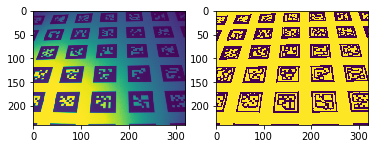

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#平滑处理采用均值平滑(cv2.blur或者cv2.boxFilter)
def adaptiveThresh(I,winSize,ratio=0.15):#比例系数ratio一般0.15
    #第一步：图像平滑
    I_mean = cv2.blur(I,winSize)
    #I_mean = cv2.boxFilter(I,cv2.CV_32FC1,winSize)#结果相同，但不知道blur没有指定32位有没有影响，等下试试
    #第二步：原图与平滑结果做差
    out = I - (1.0-ratio)*I_mean
    #第三步： 当差值大于或等于0，输出255,；小于0，输出0
    out[out>=0] = 255
    out[out<0] = 0
    out = out.astype(np.uint8)#图像格式转换为255，
    return out

src = cv2.imread("image3.png",0)
dst = adaptiveThresh(src,(7,7),0.15)
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(dst)
plt.show

PythonAPI：

cv2.adaptiveThreshold(src,dst,maxValue,adaptiveMethod,thresholdType,blockSize,c)

    maxValue:
        最大输出灰度值
    adaptiveMethod:
        ADAPTIVE_THRESH_MEAN_C:均值平滑
        ADAPTIVE_THRESH_GAUSSIAN_C：高斯平滑
        ADAPTIVE_THRESH_MEDIAN_C：中值平滑
    thresholdType：
        THRESH_BINARY、THRESH_BINARY_INV
    blockSIZE：
        滑动窗口大小，原理里的winSize
    C：
        比例算子，原理里的ratio
        

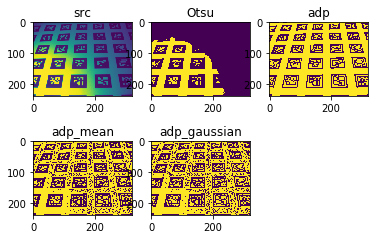

In [6]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("image3.png",0)

#Otsu算法
the_Otsu = 0
the_Otsu,dst_Otsu = cv2.threshold(src,the_Otsu,255,8)

#用上面定义的adaptiveThresh进行阈值分割
dst_adaptiveThresh = adaptiveThresh(src,(7,7),0.15)

#7*7的自适应算法,PythonAPI
dst_adaptive_mean = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,0.15)
dst_adaptive_gaussian = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,0.15)

titles = ("src","Otsu","adp","adp_mean","adp_gaussian")
images = (src,dst_Otsu,dst_adaptiveThresh,dst_adaptive_mean,dst_adaptive_gaussian)

for i in xrange(5):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    cv2.imshow(titles[i],images[i])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

通过adaptiveThresh进行阈值分割效果比OpencvAPI好一些，查找资料，尝试对src先进行平滑处理，再自适应阈值分割

重新编写的代码如下

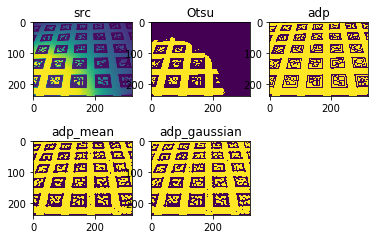

In [5]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("image3.png",0)

#Otsu算法
the_Otsu = 0
the_Otsu,dst_Otsu = cv2.threshold(src,the_Otsu,255,8)

#用上面定义的adaptiveThresh进行阈值分割
dst_adaptiveThresh = adaptiveThresh(src,(7,7),0.15)

#7*7的自适应算法,PythonAPI
src_mean = cv2.blur(src,(7,7))
dst_adaptive_mean = cv2.adaptiveThreshold(src_mean,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,0.15)
src_gaussian = cv2.GaussianBlur(src,(7,7),5)
dst_adaptive_gaussian = cv2.adaptiveThreshold(src_gaussian,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,0.15)

titles = ("src","Otsu","adp","adp_mean","adp_gaussian")
images = (src,dst_Otsu,dst_adaptiveThresh,dst_adaptive_mean,dst_adaptive_gaussian)

for i in xrange(5):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    cv2.imshow(titles[i],images[i])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

效果稍微好一些，噪点去除了，但是边框模糊了，还是没有代码实现的好